In [1]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, DatetimeTickFormatter
from bokeh.models.tools import HoverTool
from bokeh.io.export import get_screenshot_as_png
from bokeh.io import output_notebook
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import utils

output_notebook()

Loading BokehJS ...

In [2]:
#  generate all possible hours
dates = pd.DataFrame(pd.date_range(utils.START_DATE, utils.END_DATE, freq='H')).rename(columns={0: 'date'})
utils.expand_dt_col(dates, 'date', True)
dates = dates.set_index('date')

In [3]:
dates.head(40)

,day_of_year,weekday,week,month,hour
date,,,,,
2005-02-01 00:00:00,32,1,5,2,0
2005-02-01 01:00:00,32,1,5,2,1
2005-02-01 02:00:00,32,1,5,2,2
2005-02-01 03:00:00,32,1,5,2,3
2005-02-01 04:00:00,32,1,5,2,4
2005-02-01 05:00:00,32,1,5,2,5
2005-02-01 06:00:00,32,1,5,2,6
2005-02-01 07:00:00,32,1,5,2,7
2005-02-01 08:00:00,32,1,5,2,8


In [4]:
dates.shape

(132865, 5)

In [5]:
weather = utils.wu_weather(hourly=True, interpolate_limit=0)
weather

,temp,dwpt,heat_idx,rh,pressure,vis,wc,wdir,wspd,prcp,...,day_of_year,weekday,week,month,hour,cloud_cover_BKN,cloud_cover_CLR,cloud_cover_FEW,cloud_cover_OVC,cloud_cover_SCT
datetime,,,,,,,,,,,,,,,,,,,,,
2005-02-01 00:00:00,28.0,19.0,28.0,69.0,30.38,10.0,28.0,50.0,3.0,0.0,...,32,1,5,2,0,0,1,0,0,0
2005-02-01 01:00:00,28.0,16.0,28.0,61.0,30.38,10.0,28.0,50.0,0.0,0.0,...,32,1,5,2,1,0,1,0,0,0
2005-02-01 02:00:00,27.0,16.0,27.0,63.0,30.39,10.0,27.0,50.0,0.0,0.0,...,32,1,5,2,2,0,1,0,0,0
2005-02-01 03:00:00,24.0,15.0,24.0,69.0,30.39,10.0,18.0,80.0,5.0,0.0,...,32,1,5,2,3,0,1,0,0,0
2005-02-01 04:00:00,26.0,16.0,26.0,66.0,30.40,10.0,26.0,90.0,3.0,0.0,...,32,1,5,2,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29 20:00:00,45.0,43.0,45.0,93.0,29.83,1.0,37.0,50.0,20.0,0.0,...,89,6,13,3,20,0,0,0,1,0
2020-03-29 21:00:00,45.0,43.0,45.0,93.0,29.87,1.0,39.0,40.0,14.0,0.0,...,89,6,13,3,21,0,0,0,1,0
2020-03-29 22:00:00,46.0,43.0,46.0,89.0,29.87,2.0,39.0,50.0,17.0,0.0,...,89,6,13,3,22,0,0,0,1,0


The weather is missing 554 hours worth of data (roughly 23 weeks).

In [8]:
weather.columns

Index(['temp', 'dwpt', 'heat_idx', 'rh', 'pressure', 'vis', 'wc', 'wdir',
       'wspd', 'prcp', 't_app', 'uv_idx', 'day_of_year', 'weekday', 'week',
       'month', 'hour', 'cloud_cover_BKN', 'cloud_cover_CLR',
       'cloud_cover_FEW', 'cloud_cover_OVC', 'cloud_cover_SCT'],
      dtype='object')

In [9]:
actual_load = utils.pal(hourly=True)
actual_load

,pal_min,pal_max,pal_mean
Time Stamp,,,
2005-02-01 00:00:00,4981.4,5271.6,5078.050
2005-02-01 01:00:00,4727.6,4941.5,4810.964
2005-02-01 02:00:00,4645.3,4746.3,4675.925
2005-02-01 03:00:00,4593.2,4643.3,4615.027
2005-02-01 04:00:00,4590.3,4674.2,4632.609
...,...,...,...
2020-03-29 20:00:00,4922.6,4992.0,4955.125
2020-03-29 21:00:00,4785.4,4915.4,4841.033
2020-03-29 22:00:00,4592.1,4772.6,4681.367


Similarly, actual load is missing 595 hours of data (roughly 25 weeks).  

In [10]:
print('Null in weather data? {val}'.format(val=weather.isnull().values.any()))
print('Null in load data? {val}'.format(val=actual_load.isnull().values.any()))

Null in weather data? False
Null in load data? False


We also checked to make sure the weather and load data were complete (outside of the missing dates).

Let's see if there are any patterns to this and if we can reasonably interpolate missing values.  
We join the 3 DataFrames together with a left join to preserve the missing rows, followed by a print to double check our work.

In [11]:
df = dates.join(weather, how='left', rsuffix='_weather').join(actual_load, how='left')
df

,day_of_year,weekday,week,month,hour,temp,dwpt,heat_idx,rh,pressure,...,month_weather,hour_weather,cloud_cover_BKN,cloud_cover_CLR,cloud_cover_FEW,cloud_cover_OVC,cloud_cover_SCT,pal_min,pal_max,pal_mean
date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 00:00:00,32,1,5,2,0,28.0,19.0,28.0,69.0,30.38,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,4981.4,5271.6,5078.050
2005-02-01 01:00:00,32,1,5,2,1,28.0,16.0,28.0,61.0,30.38,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,4727.6,4941.5,4810.964
2005-02-01 02:00:00,32,1,5,2,2,27.0,16.0,27.0,63.0,30.39,...,2.0,2.0,0.0,1.0,0.0,0.0,0.0,4645.3,4746.3,4675.925
2005-02-01 03:00:00,32,1,5,2,3,24.0,15.0,24.0,69.0,30.39,...,2.0,3.0,0.0,1.0,0.0,0.0,0.0,4593.2,4643.3,4615.027
2005-02-01 04:00:00,32,1,5,2,4,26.0,16.0,26.0,66.0,30.40,...,2.0,4.0,0.0,1.0,0.0,0.0,0.0,4590.3,4674.2,4632.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29 20:00:00,89,6,13,3,20,45.0,43.0,45.0,93.0,29.83,...,3.0,20.0,0.0,0.0,0.0,1.0,0.0,4922.6,4992.0,4955.125
2020-03-29 21:00:00,89,6,13,3,21,45.0,43.0,45.0,93.0,29.87,...,3.0,21.0,0.0,0.0,0.0,1.0,0.0,4785.4,4915.4,4841.033
2020-03-29 22:00:00,89,6,13,3,22,46.0,43.0,46.0,89.0,29.87,...,3.0,22.0,0.0,0.0,0.0,1.0,0.0,4592.1,4772.6,4681.367


In [12]:
print('Null in load data? {val}'.format(val=df.isnull().values.any()))

Null in load data? True


Next, we take a look at the combined null data to see whether or not the missing load data overlaps with the weather.

In [13]:
null_data = df[df.isnull().any(axis=1)]

In [14]:
null_data.shape

(1149, 30)

None of it overlaps (554 + 595 = 1149).

Let's make some DataFrames that have the null values for the load and weather...

In [15]:
null_weather = dates.join(weather, how='left', rsuffix='weather_')
null_weather = null_weather[null_weather.isnull().any(axis=1)]
null_weather['datetime'] = null_weather.index

null_load = dates.join(actual_load, how='left')
null_load = null_load[null_load.isnull().any(axis=1)]
null_load['datetime'] = null_load.index

print(null_weather.shape)
print(null_load.shape)

(554, 28)
(595, 9)


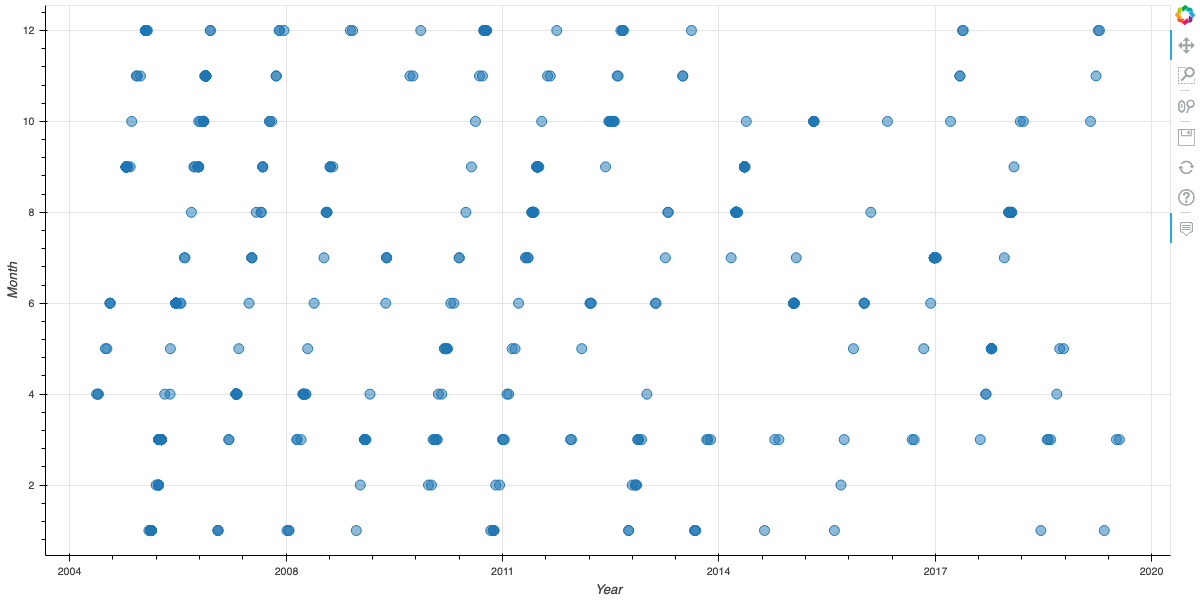

In [16]:
weather_chart = figure(plot_width=1200, plot_height=600, x_axis_label='Year', y_axis_label='Month')
weather_chart.xaxis.formatter=DatetimeTickFormatter()
weather_chart.circle(x='datetime', y='month', source=null_weather, size=10, fill_alpha=.5)
weather_chart.add_tools(HoverTool(
    tooltips=[
        ('hour', '@hour'),
    ],
    formatters={
        'datetime': 'datetime', # use 'datetime' formatter for 'date' field
    }
))
# show(weather_chart)  # for interactive chart
get_screenshot_as_png(weather_chart, driver=None)

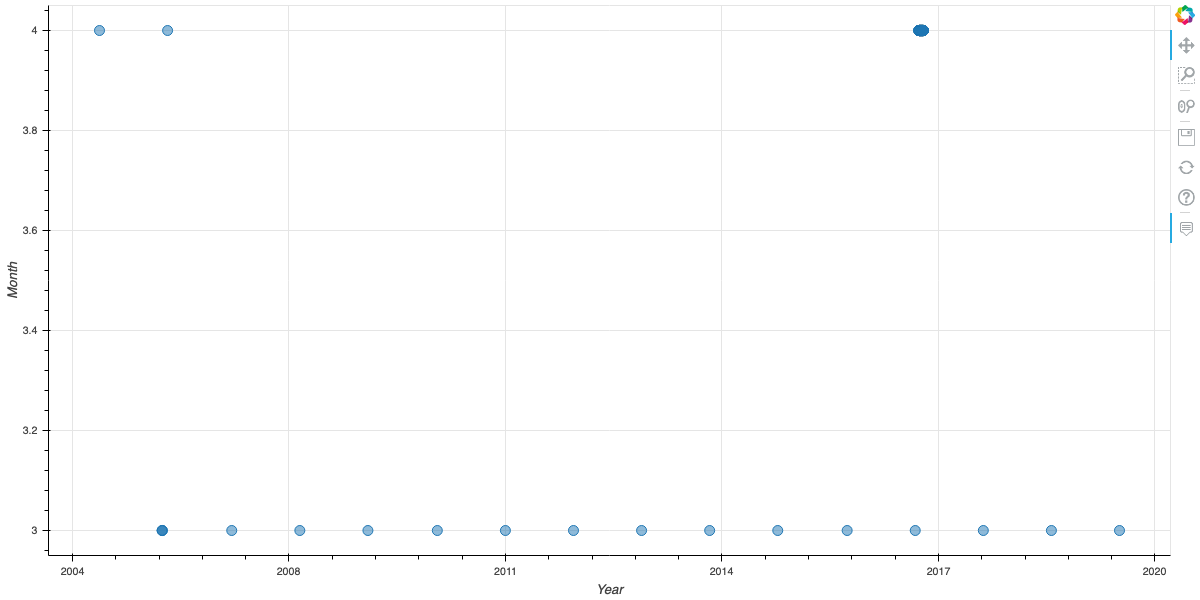

In [17]:
load_chart = figure(plot_width=1200, plot_height=600, x_axis_label='Year', y_axis_label='Month')
load_chart.xaxis.formatter=DatetimeTickFormatter()
load_chart.circle(x='datetime', y='month', source=null_load, size=10, fill_alpha=.5)
load_chart.add_tools(HoverTool(
    tooltips=[
        ('hour', '@hour'),
    ],
    formatters={
        'datetime': 'datetime', # use 'datetime' formatter for 'date' field
    }
))
# show(load_chart)  # for interactive chart
get_screenshot_as_png(load_chart, driver=None)

Most of the missing load data follows a pattern that appears to be daylight savings time. Additionally, the month of April 2017 is nearly entirely missing.

In [18]:
null_weather = dates.join(weather, how='left', rsuffix='weather_')
x = null_weather.temp.isnull().astype(int).groupby(df.temp.notnull().astype(int).cumsum()).sum()
x[x > 2]

temp
3184       3
5248      23
7691      22
8338      22
8419       4
9363      23
9652      22
11499     23
14987      3
15004      3
15264     14
15269      4
19150     21
22530      3
30736      3
50879      6
51051      3
83075     23
84142      9
90440      6
93020      5
99478      3
108460     9
115761     3
118013     5
118344     5
Name: temp, dtype: int64

We have a few days where more than 2 hours of weather observations are missing.

In [19]:
null_weather = dates.join(weather, how='left', rsuffix='weather_')
total_hours = null_weather.shape[0]
print(total_hours - null_weather.dropna().shape[0])
null_weather.interpolate(method='nearest', limit=2, inplace=True)
print(total_hours - null_weather.dropna().shape[0])
null_weather.dropna().shape

554
218


(132647, 27)

We went from 554 null weather records to 218 when interpolating gaps of 2 hours or less.